<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Authors: Kevin Markham (DC)_

---

In [54]:
# Load pandas into python
import pandas as pd
from matplotlib import pyplot as plt

# Show plots inside the notebook
%matplotlib inline

## Learning Objectives

By the end of the lesson, you will be able to..
- **Explain** what Pandas is and how it relates to data science
- **Manipulate** Pandas DataFrames and Series
- **Filter and sort** data using Pandas
- **Manipulate** DataFrame columns
- **Handle** missing values

# Pandas Data Types

Pandas is a Python library that provides two datatypes: `DataFrame` and `Series`.

## DataFrame

- Each row has a label (the `row index`)
- Each column has a label (the `column index`)

In [55]:
# Example dataframe
my_df = pd.DataFrame({'a': [1, 1, 3, 4], 'b': ['x', 'y', 'y', 'z'], 'c': [5., 6., 5., 8.]})
my_df

,a,b,c
0,1,x,5.0
1,1,y,6.0
2,3,y,5.0
3,4,z,8.0


## Series

Similar to a single column from a DataFrame without the column index.

In [56]:
# Pandas series
my_series = my_df.loc[:,'a']
my_series

0    1
1    1
2    3
3    4
Name: a, dtype: int64

**Note**

It is possible to have a one-column DataFrame, which does have a `column index`. Sometimes the difference matters, so pay attention to it, especially if you are getting surprising errors.

In [57]:
one_column_df = my_df.loc[:, ['a']]
one_column_df

,a
0,1
1,1
2,3
3,4


# Vectorization

In [58]:
new_df = my_df.copy()

# don't do this!
for row_num, row in my_df.iterrows():
    new_df.loc[row_num, 'a'] = my_df.loc[row_num, 'a'] + 1

new_df

,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


For-loops are **slow** and **ugly**! Use vector and matrix math instead (to be discussed more in a later lesson).

In [59]:
new_df = my_df.copy()

# do this instead
my_df.loc[:,'a'] = my_df.loc[:,'a'] + 1
my_df


,a,b,c
0,2,x,5.0
1,2,y,6.0
2,4,y,5.0
3,5,z,8.0


`pandas` automatically "broadcasts" to match dimensions when possible

**Exercise.**

- Multiply column "a" of `new_df` by 3 and assign the result back to column "a" of the dataframe as above.

In [60]:
my_df.loc[:,'a'] = my_df.loc[:,'a'] * 3
my_df

,a,b,c
0,6,x,5.0
1,6,y,6.0
2,12,y,5.0
3,15,z,8.0


- Use `*` to multiply colum "a" of `new_df` by column `c` of `new_df`. Simply display the result, without changing `new_df`. What math did `pandas` do to get this result?

In [61]:
new_df = my_df.copy()
new_df.loc[:,'a'] * new_df.loc[:,'c']

0     30.0
1     36.0
2     60.0
3    120.0
dtype: float64

Pandas multiplied the two columns elementwise.

# DataFrame Methods and Attributes

- An **attribute** is a piece of information about a class instance. You use dot syntax to access it (e.g., my_df.shape).
- A **method** is a function that is defined for a specific class (e.g. Series, DataFrame). You use dot syntax to call it, with parentheses for passing in arguments.

In [62]:
# View row index
my_df.index

RangeIndex(start=0, stop=4, step=1)

In [63]:
# View column index
my_df.columns

Index(['a', 'b', 'c'], dtype='object')

In [64]:
# Select first n rows, 5 by default
my_df.head()

,a,b,c
0,6,x,5.0
1,6,y,6.0
2,12,y,5.0
3,15,z,8.0


In [65]:
# Select first 2 rows
my_df.head(2)

,a,b,c
0,6,x,5.0
1,6,y,6.0


In [66]:
# Select last 2 rows
my_df.tail(2)

,a,b,c
2,12,y,5.0
3,15,z,8.0


In [67]:
# See the types of the columns
my_df.dtypes
# object is anything which other than the number

a      int64
b     object
c    float64
dtype: object

In [68]:
# Get the number of rows and columns
my_df.shape

(4, 3)

In [69]:
# Get a concise summary of DataFrame contents "from the computer's perspective"
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
a    4 non-null int64
b    4 non-null object
c    4 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 176.0+ bytes


In [70]:
# Get a concsise summary of DataFrame contents from a data modeler's perspective
my_df.describe()

,a,c
count,4.00,4.000000
mean,9.75,6.000000
std,4.50,1.414214
min,6.00,5.000000
25%,6.00,5.000000
50%,9.00,5.500000
75%,12.75,6.500000
max,15.00,8.000000


In [71]:
# Get summary information for non-numeric columns
my_df.describe(include=['object'])

,b
count,4
unique,3
top,y
freq,2


In [72]:
# Get summary information for all columns
my_df.describe(include='all')

,a,b,c
count,4.00,4,4.000000
unique,NaN,3,NaN
top,NaN,y,NaN
freq,NaN,2,NaN
mean,9.75,NaN,6.000000
std,4.50,NaN,1.414214
min,6.00,NaN,5.000000
25%,6.00,NaN,5.000000
50%,9.00,NaN,5.500000
75%,12.75,NaN,6.500000


In [73]:
# Get the means of the numeric columns
my_df.mean()

a    9.75
c    6.00
dtype: float64

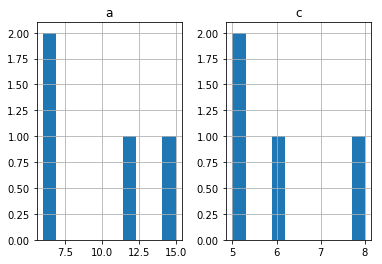

In [74]:
# Get histograms of the numeric columns
fig, ax = plt.subplots(nrows=1, ncols=2)
my_df.hist(ax=ax);

> **Note:** `my_df.hist()` will produce the same result here, but it will serve you well to get into the habit of making your figure (`fig`) and axes (`ax`) explicit.

**Exercise.** Use the `users` DataFrame loaded in the next cell for the following exercises.

In [75]:
users=pd.read_table('data/user.tbl', sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


- Print the first 30 rows.

In [76]:
users.head(30)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


- Print the last 20 rows.

In [77]:
users.tail(20)

,user_id,age,gender,occupation,zip_code
923,924,29,M,other,11753
924,925,18,F,salesman,49036
925,926,49,M,entertainment,01701
926,927,23,M,programmer,55428
927,928,21,M,student,55408
928,929,44,M,scientist,53711
929,930,28,F,scientist,07310
930,931,60,M,educator,33556
931,932,58,M,educator,06437
932,933,28,M,student,48105


- Use the built-in Python function `type` to get the type of `users`.

In [78]:
type(users)

pandas.core.frame.DataFrame

- Get the row index.

In [79]:
users.index

RangeIndex(start=0, stop=943, step=1)

- Get the column names.

In [80]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

- Get the data types of the columns.

In [81]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

- Get the number of rows and columns.

In [82]:
users.shape

(943, 5)

- Get concise summary of contents of `users` (types, memory use, etc.)

In [83]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


- Get summary statistics for `users`.

In [84]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


# Selecting Rows and Columns

There are many ways to slice DataFrames.

## Recommended Approach

Use `.loc` and `.iloc`.

In [85]:
# Select columns "a" and "b" using .loc, passing in both column names
my_df.loc[:,'a']  # note row, column. : is for all rows, then comes column
my_df.loc[:,['a','b']] # note when to get 2 or more columns, you pass it as a list

,a,b
0,6,x
1,6,y
2,12,y
3,15,z


In [86]:
# Select columns "a" and "b" using .loc, passing in a range of column names
my_df.loc[:,'a':'b']

,a,b
0,6,x
1,6,y
2,12,y
3,15,z


In [87]:
# Select columns "a" and "b" using .iloc
my_df.iloc[:, [0, 1]] # iloc does by position, loc does by labels

,a,b
0,6,x
1,6,y
2,12,y
3,15,z


In [88]:
# Select rows 1 and 2 using .loc
my_df.loc[[1, 2], :]

,a,b,c
1,6,y,6.0
2,12,y,5.0


In [89]:
# Select rows 1 and 2 using .iloc
my_df.iloc[[1,2], :]
my_df.iloc[1:3, :]

,a,b,c
1,6,y,6.0
2,12,y,5.0


In [90]:
# Select row 1 from columns "b" and "c" using .loc. What type is the result?
my_df.loc[1, ['b', 'c']] # note no columns so the type of return value is Series

b    y
c    6
Name: 1, dtype: object

In [91]:
# Select row 1 from columns "b" and "c" using .loc so that the result is a DataFrame
my_df.loc[[1], ['b', 'c']] # note how you passed a list this time to row -> get the data frame

,b,c
1,y,6.0


In [92]:
# Select row 1 from columns "b" and "c" using .iloc
my_df.iloc[1, [1, 2]]

b    y
c    6
Name: 1, dtype: object

## Alternative approaches

I do not recommend using these approach, but you should be able to recognize them.

In [93]:
# Dictionary-style column selection
my_df['c']

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [94]:
# Selecting multiple columns
my_df[['b', 'c']]

,b,c
0,x,5.0
1,y,6.0
2,y,5.0
3,z,8.0


In [95]:
# Slicing into a series
my_df['c'][0]

5.0

In [96]:
# Dot syntax
my_df.c

0    5.0
1    6.0
2    5.0
3    8.0
Name: c, dtype: float64

In [97]:
# Slicing into a series
my_df.c[1]

6.0

**Exercise.**

Use the `users` DataFrame for the following exercises.

- Select the "gender" column using `.loc`.

In [98]:
users.loc[:,'gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

- Select rows 10-20 (inclusive) of the "gender" column using .loc.

In [99]:
users.loc[10:20,'gender']

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

- Select the "gender" column using `.iloc`.

In [100]:
users.iloc[:,2]

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

- Select rows 10-20 (inclusive) of the "gender" column using `.iloc`.

In [101]:
users.iloc[10:21,2]

10    F
11    F
12    M
13    M
14    F
15    M
16    M
17    F
18    M
19    F
20    M
Name: gender, dtype: object

- Get the type of the object returned from the previous cell.

In [102]:
type(users.iloc[10:21,2])

pandas.core.series.Series

- Describe all `object` columns.

In [103]:
users.describe(include='object')

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


- Describe all columns, including non-numeric.

In [104]:
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


- Calculate the mean of the ages.

In [105]:
users.loc[:,'age'].mean()

34.05196182396607

- Create a histogram of the `ages` column.

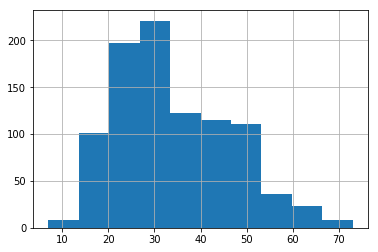

In [106]:
# Get histograms of the numeric columns
fig, ax = plt.subplots(nrows=1, ncols=1)
users.loc[:,'age'].hist(ax=ax);

# Frequency Distributions

In [107]:
users.loc[:,'gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

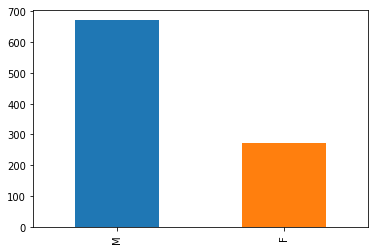

In [108]:
fig, ax = plt.subplots()
gender_counts = users.loc[:, 'gender'].value_counts()
gender_counts.plot(kind='bar', ax=ax);

In [109]:
# can also be used with numeric variables
users.loc[:,'age'].value_counts()

30    39
25    38
22    37
28    36
27    35
26    34
24    33
29    32
20    32
32    28
23    28
35    27
21    27
33    26
31    25
19    23
44    23
39    22
40    21
36    21
42    21
51    20
50    20
48    20
49    19
37    19
18    18
34    17
38    17
45    15
      ..
47    14
43    13
46    12
53    12
55    11
41    10
57     9
60     9
52     6
56     6
15     6
13     5
16     5
54     4
63     3
14     3
65     3
70     3
61     3
59     3
58     3
64     2
68     2
69     2
62     2
11     1
10     1
73     1
66     1
7      1
Name: age, Length: 61, dtype: int64

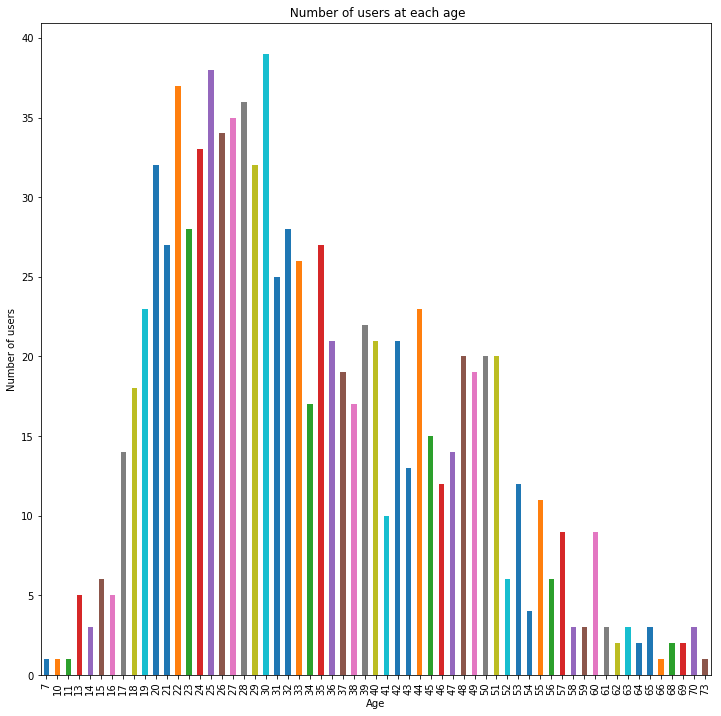

In [110]:
# Plot age bar with plot title and axis labels
fig, ax = plt.subplots(figsize=(12, 12))
sorted_age_counts = users.loc[:, 'age'].value_counts().sort_index()
sorted_age_counts.plot(kind='bar', ax=ax);
ax.set_xlabel('Age');
ax.set_ylabel('Number of users');
ax.set_title(' Number of users at each age');

> **Note:** You will often see people create plots in a different way, using functions calls such as `plt.title('Number of users on page')` rather than `Axes` methods such as `ax.set_title('Number of users on page')`. **I strongly recommend that you stick with the approach illustrated here**. See http://pbpython.com/effective-matplotlib.html and https://realpython.com/python-matplotlib-guide/.

**Exercise.**

In [111]:
# Read drinks.csv into a DataFrame called 'drinks'
drinks = pd.read_csv('./data/drinks.csv')

- Print the head and the tail.

In [112]:
drinks.head()
drinks.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


- Print the index, data types, and shape

In [113]:
print(drinks.index)
print(drinks.dtypes)
print(drinks.shape)

RangeIndex(start=0, stop=193, step=1)
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object
(193, 6)


- Print the 'beer_servings' Series.

In [114]:
drinks.loc[:,'beer_servings']

0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

- Calculate the average 'beer_servings' for the entire dataset.

In [115]:
drinks.loc[:,'beer_servings'].mean()

106.16062176165804

- Count the number of occurrences of each 'continent' value.

In [116]:
print(drinks.loc[:,'continent'].value_counts())
print(drinks.loc[:, 'continent'].value_counts(dropna=False))

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64
AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64


- **Bonus:** What is wrong with the last result? How did the problem arise?

In [117]:
some columns have NaN value. Why NaN, the actual value was NA which Panda took NaN

SyntaxError: invalid syntax (<ipython-input-117-ad5842b03f75>, line 1)

North America is missing because "NA" was read as indicating missing values.

# Filtering and Sorting

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**logical filtering: only show users with age < 20**

In [ ]:
# create a Series of booleans..
# in Pandas, this comparison is performed element-wise on each row of data
young_bool = users.loc[:, 'age'] < 20
young_bool

In [ ]:
# ..and use that Series to filter rows
users.loc[young_bool, :] # note as we only want to select from series, thus instead of row passed series
users.loc[~young_bool, :] # note the tilda ~ NOT condition 

In [ ]:
# or, combine into a single step -- which one is easier to read?
users.loc[users.loc[:,'age'] < 20, :] # more memory efficient, as inner one will be garbage collected

In [ ]:
# select "occupation" column from the filtered results
users.loc[young_bool, 'occupation']

In [ ]:
# value_counts of resulting Series
users.loc[young_bool, 'occupation'].value_counts()

**Logical filtering with multiple conditions**

In [ ]:
# ampersand for AND condition. (this is a "bitwise" AND)
# important: you MUST put parentheses around each expression because '&' has a higher precedence than '<'!
users.loc[(users.loc[:, 'age'] < 20) & (users.loc[:, 'gender'] == 'M'), :]



In [ ]:
# pipe for OR condition. (this is a "bitwise" OR)
# important: you MUST put parentheses around each expression because '|' has a higher precedence than '<'!
young_or_male = (users.loc[:, 'age'] < 20) | (users.loc[:, 'gender'] == 'M')
users.loc[young_or_male, :]

In [ ]:
# preferred alternative to multiple OR conditions
doctor_or_lawyer = users.loc[:, 'occupation'].isin(['doctor', 'lawyer'])
users.loc[doctor_or_lawyer, :]

**Sorting**

In [ ]:
# sort a Series
users.loc[:, 'age'].sort_values()

In [ ]:
# sort a DataFrame by a single column
users.sort_values('age')

In [ ]:
# use descending order instead
users.sort_values('age',ascending=False)

In [ ]:
# sort by multiple columns
users.sort_values(['occupation', 'age'])

<a id="exercise-two"></a>
**Exercise:** Use `drinks` dataframe from earlier to complete the following.

- Filter the DataFrame to only include European countries.

In [ ]:
eu_continent = (drinks.loc[:,'continent'] == 'EU')
drinks.loc[eu_continent, :]

- Filter the DataFrame to only include European countries with more than 300 `wine_servings`.

In [ ]:
more_wine = (drinks.loc[:,'wine_servings'] > 300)
drinks.loc[eu_continent & more_wine, :]

- Calculate the average 'beer_servings' for all of Europe.

In [ ]:
drinks.loc[eu_continent, 'beer_servings'].mean()

- Determine which 10 countries have the highest `total_litres_of_pure_alcohol`.

In [ ]:
(drinks
 .sort_values('total_litres_of_pure_alcohol', ascending=False)
 .head(10)
 .loc[:, 'country']
)

<a id="columns"></a>
# Renaming, Adding, and Removing Columns

In [ ]:
# Are beer servings and spirit servings correlated?
fig, ax = plt.subplots()
drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings', ax=ax)
drinks.corr()

In [ ]:
# renaming one or more columns in a single output using value mapping
drinks.rename(columns={'beer_servings': 'beer', 'wine_servings': 'wine'})

In [ ]:
# renaming one or more columns in the original DataFrame
drinks.rename(columns={'beer_servings': 'beer', 'wine_servings': 'wine'},
             inplace=True
             )

In [ ]:
drinks

In [ ]:
# replace all column names using a list of matching length
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks.columns = drink_cols
drinks

In [ ]:
# replace during file reading (disables the header from the file)
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv('data/drinks.csv', header = 0, names = drink_cols)
drinks

In [ ]:
# add a new column as a function of existing columns
drinks.loc[:, 'servings'] = (
                            drinks.loc[:, 'beer'] 
                            + drinks.loc[:, 'spirit'] 
                            + drinks.loc[:, 'wine'] 
                            )
drinks.loc[:, 'mL'] = drinks.loc[:, 'liters'] * 1000

drinks.head()

**Removing Columns**

In [ ]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1)
# good idea to first run like above. 
# and then when are confident and want delete do below
drinks.drop('mL', axis=1, inplace=True)


In [ ]:
drinks

In [ ]:
# drop multiple columns
drinks.drop(['wine', 'servings'], axis=1)

In [ ]:
# drop on the original DataFrame rather than returning a new one


Many `pandas` methods return a new DataFrame by default but can also be applied in-place as illustrated above.

# Handling Missing Values

Pandas represents missing values as `None` or `np.NaN`.

It is important to distinguish between several classes of missing data and handle it accordingly:

- Data that was never collected
- Data that was handled incorrectly at some point (possibly by you!)
- A "null" value, e.g. "zero", "false", "not applicable", or "entered an empty string"

Truly missing data can be handled in three ways:

- Delete the row
- Delete the column
- Impute the values based on other rows/columns

If missingness is correlated with the value of the variable in question (e.g. patients who aren't getting better on a trial drug tend not to come back after the first dose, so their results aren't recorded), then you are in trouble.

In [ ]:
# missing values are usually excluded in calculations by default
drinks.loc[:, 'continent'].value_counts()

In [ ]:
# includes missing values
drinks.loc[:, 'continent'].value_counts(dropna=False)

In [ ]:
# find missing values in a Series
# True if missing, False if not missing
drinks.loc[:, 'continent'].isnull()

In [ ]:
# count the missing values - sum() works because True is 1 and False is 0
drinks.loc[:, 'continent'].isnull().sum() # 1 for all True values, thus sum is counting the number of true in series

In [ ]:
# True if not missing, False if missing
drinks.loc[:, 'continent'].notnull()

In [ ]:
# only show rows where continent is not missing
drinks.loc[drinks.loc[:, 'continent'].notnull(), :]

**Understanding Pandas Axis**

In [ ]:
# sums "down" the 0 axis (rows) -- so, we get the sums of each column
drinks.sum(axis=0)

In [ ]:
# axis=0 is the default
drinks.sum()

In [ ]:
# sums "across" the 1 axis (columns) -- so, we get the sums of numeric values in the row (beer+spirit+wine+liters+..)
drinks.sum(axis=1)

In [ ]:
drinks.loc[:, ['beer', 'wine', 'spirit']].sum(axis=1)

**Find missing values in a DataFrame**

In [ ]:
# Get DataFrame of booleans indicating locations of missing values in `drinks`
drinks.isnull()

In [ ]:
# count the missing values in each column
drinks.isnull().sum(axis=0)

**Dropping Missing Values**

In [ ]:
# drop a row if ANY values are missing from any column -- can be dangerous!
drinks.dropna()

In [ ]:
# drop a row only if ALL values are missing
drinks.dropna(how='all')

**Filling Missing Values**
If you noticed the continent North American, NA, does not appear in the `continent` column.  Pandas read in the original data and saw 'NA' and thought it was a missing value and converted it to a 'NaN', missing value.

In [ ]:
# fill in missing values with 'NA' -- this is dangerous to do without manually verifying them!
drinks.loc[:, 'continent'].fillna(value='NA')

In [ ]:
# modifies 'drinks' in-place
drinks.loc[:, 'continent'].fillna(value='NA', inplace=True)

In [ ]:
# turn off the missing value filter -- better approach!
pd.read_csv('data/drinks.csv', header=0, names=drinks_cols, na_filter=False)

<a id="exercise-three"></a>
**Exercise**

- Read `./data/ufo.csv` into a DataFrame called 'ufo'.

In [ ]:
ufo = pd.read_csv('./data/ufo.csv', header=0)

- Inspect first 3 roads of `ufo`.

In [ ]:
ufo.head(3)

- Check the shape of the DataFrame.

In [ ]:
ufo.shape

- What are the three most common colors reported?

In [ ]:
(
    ufo
    .loc[:, 'Colors_Reported']
    .value_counts()
    .sort_values(ascending=False)
    .head(3)
)
# .sort_values('Colors Reported',ascending=False)

- Replace spaces with underscores in column names.

In [ ]:
# Basic: Just type a new list of column names and assign it to `ufo.columns`
# Bonus: Complete this task with a list comprehension that would work for any DataFrame.
ufo.columns = ['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time']
ufo.columns

- For reports in VA, what's the most common city?

In [ ]:
ufo_va_series = ufo.loc[:,'State'] == 'VA'
ufo_va_df = ufo.loc[ufo_va_series, :]
(
    ufo_va_df
    .loc[:,'City']
    .value_counts()
    .sort_values(ascending=False)
    .head(1)
)

- Get a DataFrame containing only reports from Arlington, VA

In [ ]:
ufo_va_arlington = (ufo_va_series) & (ufo.loc[:,'City'] == 'Arlington')
ufo_va_ar_df = ufo.loc[ufo_va_arlington, :]
ufo_va_ar_df

- Count the number of missing values in each column

In [ ]:
ufo.isnull().sum()

- How many rows remain if you drop all rows with any missing values?

In [ ]:
len(ufo.dropna())

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-Apply-Combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the mean() function to find the average beer consumption.
- **Combine:** We now combine the continent names with the mean()s to produce a summary of our findings.

In [ ]:
# for each continent, calculate the mean beer servings
(
    drinks.groupby('continent')
    ['beer']
    .mean()
)

In [ ]:
# for each continent, calculate the mean of all numeric columns
(
    drinks.groupby('continent')
    .mean()
)

In [ ]:
# for each continent, describe beer servings
(
    drinks.groupby('continent')
    ['beer']
    .describe()
)

In [ ]:
# "agg" allows you to apply an arbitrary aggregation function to each column
(
    drinks.groupby('continent')
    ['beer']
    .agg(
        ['count', 'mean', 'min', 'max']
    )
)

In [ ]:
# for each continent, describe all numeric columns


In [ ]:
# for each continent, count the number of rows
# first use a groupby, then use .value_counts()


<a id="exercise-four"></a>
**Exercise**

Use the `users` dataframe to complete the following exercises.

- For each occupation in 'users', count the number of occurrences

In [121]:
users.loc[:,'occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
salesman          12
lawyer            12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

- For each occupation, calculate the mean age.

In [130]:
(users
 .groupby('occupation')
 ['age']
 .mean()
)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

- For each occupation, calculate the minimum and maximum ages.

In [132]:
(users
 .groupby('occupation')
 ['age']
 .agg(['min', 'max'])
)

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


- For each combination of occupation and gender, calculate the mean age.

In [135]:
(users
 .groupby(['occupation', 'gender'])
 ['age']
 .agg(['mean'])
)

mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

----

<a id="joining-dataframes"></a>
### Joining (Merging) DataFrames

"Tidy data" is data that is organized as follows:

- One variable per column
- One observation per row
- One type of observational unit per table

> This way of organizing data is also called "third normal form."

In [137]:
# Load movie titles
movie_cols = ['movie_id', 'title']
movies_path = './data/movies.tbl'
movies = pd.read_table(movies_path, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin-1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [138]:
# Load movie ratings
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings_path = './data/movie_ratings.tsv'
ratings = pd.read_table(ratings_path, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


Now if we want to know the title associated with a particular rating, we match up the rows of the two tables by `movie_id`.

SQL calls this "matching up" operation a **join**. Pandas calls it **merge**.

In [141]:
# merge 'movies' and 'ratings' (inner join on 'movie_id')
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head(5)

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [142]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


This "normalized" format is conceptually nice, and it saves space.

Storing data in a "denormalized" format (e.g. by storing move titles in the table with ratings) is sometimes justified to avoid expensive join operations, especially in web programming.

<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [ ]:
# apply an arbitrary function to each value of a Pandas column, storing the result in a new column
users.loc[:, 'under30'] = users.loc[:, 'age'].apply(lambda age: age < 30)

In [ ]:
# apply an arbitrary function to each row of a DataFrame, storing the result in a new column
#  (remember that by default axis=0. Since we want to go row-by-row, we set axis=1)
users.loc[:, 'under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [ ]:
# map existing values to a different set of values
users['is_male'] = users.loc[:, 'gender'].map({'F':0, 'M':1})

In [ ]:
# replace all instances of a value in a column (must match entire value)
ufo.loc[:, 'State'].replace('Fl', 'FL', inplace=True)

In [ ]:
# string methods are accessed via 'str'
ufo.loc[:, 'State'].str.upper()                               # converts to uppercase

In [ ]:
# checks for a substring
ufo.loc[:, 'Colors_Reported'].str.contains('RED', na='False') 

In [ ]:
# convert a string to the datetime format (this is often slow -- consider doing it in the read_csv() method)
ufo.loc[:, 'Time'] = pd.to_datetime(ufo.loc[:, 'Time'])
ufo.loc[:, 'Time'].dt.hour                        # datetime format exposes convenient attributes

In [ ]:
(ufo.Time.max() - ufo.Time.min()).days  # also allows you to do datetime "math"

In [ ]:
# setting and then removing an index
ufo.set_index('Time', inplace=True)
ufo

In [ ]:
ufo.reset_index(inplace=True)
ufo

In [ ]:
# change the data type of a column
drinks.loc[:, 'beer'] = drinks.loc[:, 'beer'].astype('float')

In [ ]:
# create dummy variables for 'continent' and exclude first dummy column
continent_dummies = pd.get_dummies(drinks.loc[:, 'continent'], prefix='cont').iloc[:, 1:]
continent_dummies

In [ ]:
# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
drinks = pd.concat([drinks, continent_dummies], axis=1)
drinks

<a id="uncommon-features"></a>
### OPTIONAL: Other Less Used Features of Pandas

In [ ]:
# detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # count of duplicates
users[users.duplicated()]   # only show duplicates
users.drop_duplicates()     # drop duplicate rows
users.age.duplicated()      # check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # specify columns for finding duplicates

In [ ]:
# convert a range of values into descriptive groups
drinks['beer_level'] = 'low'    # initially set all values to 'low'
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # change 101-200 to 'med'
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # change 201-400 to 'high'

In [ ]:
# display a cross-tabulation of two Series
pd.crosstab(drinks.loc[:, 'continent'], drinks.beer_level)

In [ ]:
# convert 'beer_level' into the 'category' data type
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level')   # sorts by the categorical ordering (low to high)

In [ ]:
# limit which rows are read when reading in a file -- useful for large files!
pd.read_csv('./data/drinks.csv', nrows=10)           # only read first 10 rows
pd.read_csv('./data/drinks.csv', skiprows=[1, 2])    # skip the first two rows of data

In [ ]:
# write a DataFrame out to a CSV
drinks.to_csv('drinks_updated.csv')                 # index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # ignore index

In [ ]:
# create a DataFrame from a dictionary
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

In [ ]:
# create a DataFrame from a list of lists
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

In [ ]:
# randomly sample a DataFrame
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # create a Series of booleans
train = drinks[mask]                        # will contain around 66% of the rows
test = drinks[~mask]                        # will contain the remaining rows

In [ ]:
# change the maximum number of rows and columns printed ('None' means unlimited)
pd.set_option('max_rows', None)     # default is 60 rows
pd.set_option('max_columns', None)  # default is 20 columns
print(drinks)

In [ ]:
# reset options to defaults
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [ ]:
# change the options temporarily (settings are restored when you exit the 'with' block)
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

<a id="summary"></a>
### Summary

In this notebook, the most important things to familiarize yourself with are the basics:

- Manipulating DataFrames and Series
- Filtering Columns and Rows
- Handling Missing Values
- Split-Apply-Combine (this one takes some practice!)

You will pick up more over time. Google, Stack Overflow, and the Pandas documentation are your friends!

**If you are familiar with SQL, this page is gold:** https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

# Projects

[Final Project](https://git.generalassemb.ly/chi-ds-8/final_project)

# Questions?

# [Exit Tickets](https://docs.google.com/forms/d/1BW4rVsCx8Nzp3q2B7SQ_tL1xqKZr4GGoQ5qeZfayxh4/viewform?ts=5ad40144&edit_requested=true)